In [5]:
# Standard
import numpy as np 
import pandas as pd
from numpy.random import randn

In [6]:
# Stats
from scipy import stats

In [7]:
# Plotting
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

In [25]:
dataset = randn(25)

(0, 0.01)

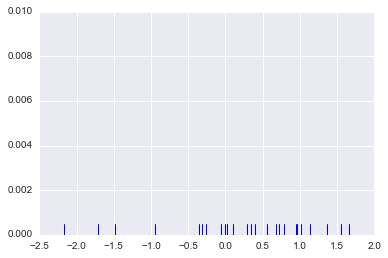

In [26]:
sns.rugplot(dataset)
plt.ylim(0,0.01)

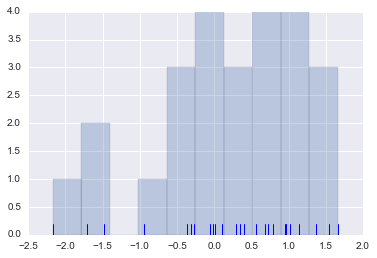

In [27]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

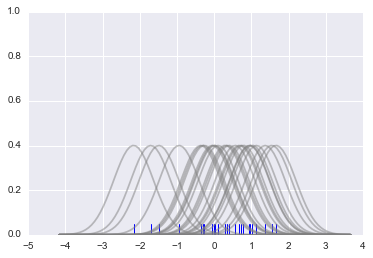

In [51]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/ (3*len(dataset))) **0.2

kernel_list = []

for data_point in dataset: 
    
    # Create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=.5)
plt.ylim(0,1)

In [52]:
dataset

array([-2.16664357,  1.37153102, -0.35935424,  0.78537353,  0.71948266,
        1.66212664,  0.01466185,  0.95913107,  1.54688736,  0.67936965,
        0.56087281,  1.13655506,  0.94797504,  0.39894384, -0.31187714,
       -1.7078159 , -0.05465626, -0.94354566, -1.48458038,  0.10605352,
       -0.26500679,  0.29583822,  0.34395923,  1.02129882, -0.01139881])

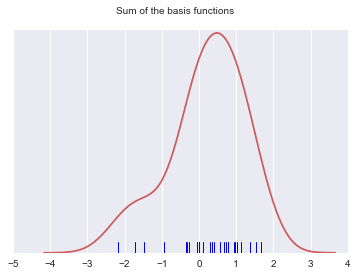

In [53]:
sum_of_kde = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')

sns.rugplot(dataset)

plt.yticks([])

plt.suptitle('Sum of the basis functions')

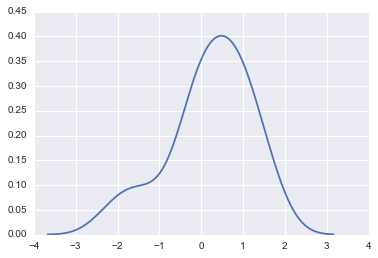

In [34]:
sns.kdeplot(dataset)

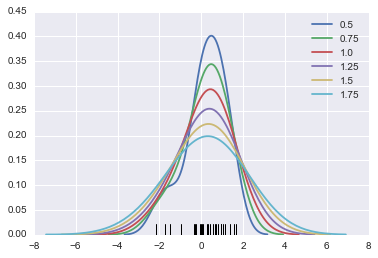

In [35]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

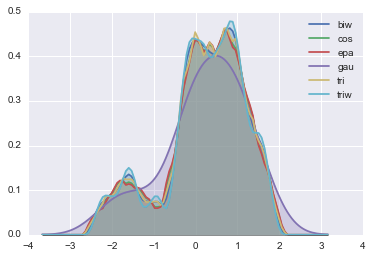

In [37]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)

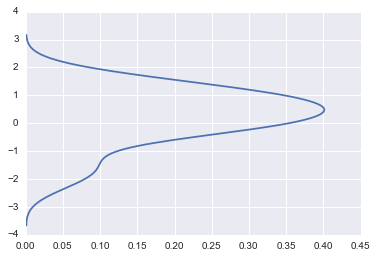

In [38]:
sns.kdeplot(dataset, vertical=True)

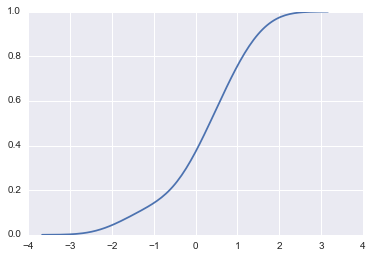

In [39]:
sns.kdeplot(dataset, cumulative=True)

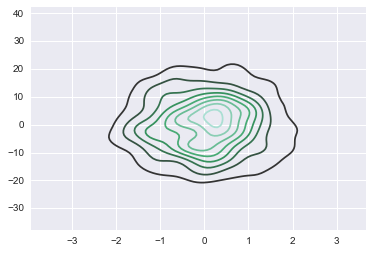

In [42]:
mean = [0, 0]

cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=['X','Y'])

sns.kdeplot(dframe)

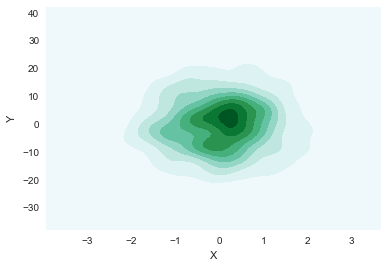

In [44]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

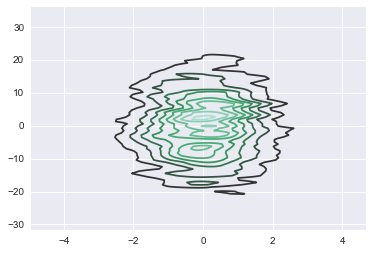

In [48]:
sns.kdeplot(dframe, bw=0.6)

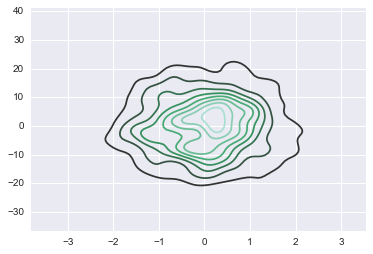

In [49]:
sns.kdeplot(dframe, bw='silverman')

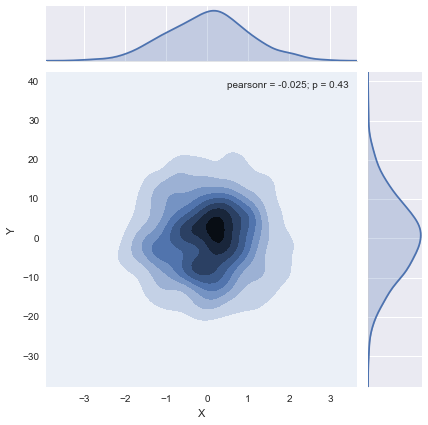

In [50]:
sns.jointplot('X', 'Y', dframe, kind='kde')